### Titanic Survival Exploration with Decision Trees
Lets predict whether a passenger will survive the Titanic incident

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
df = pd.read_csv('titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Survived**: target class, outcome of survival (0= No, 1= Yes)<br>
**Pclass**: Passenger class (1 = Upper class, 2 = Middle Class, 3 = Economy)<br>
**Name**: Name of passenger<br>
**PassengerId**: Id of passenger from 1-N number of rows<br>
**Sex**: The gender<br>
**Age**: Age of passenger (should be an integer), but here is a float because of some NaN values<br>
**SibSp**: Number of siblings and spouses of the passengers aboard<br>
**Parch**: Number of parents and children of the passengers<br>
**Ticket**: Ticket number of the passenger<br>
**Fare**: Fare paid by the passenger<br>
**Cabin**: Cabin number of the passenger (Some has NaN) values<br>
**Embarked**: Port of embarkation of passenger, C, Q, S<br>

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data preprocessing
Steps:
1. Check for missing values
2. Check for anomalies
3. Check for data types => make sure that they are equal in the entire column
4. Drop irrelevant columns by qualitative analysis
5. Check correlation
6. Convert categorical columns to numeric
7. Drop further columns if needed
8. Feature importance /selection

In [28]:
# drop columns that are irrelevant => based on qualitative analysis
# passengerid, name, ticket : these columns do not influence survival
# Cabin: dropping because there is a very low number of non-null values
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [29]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


#### Data Imputation = filling missing values
1. Fill in with mean, median values
2. Fill in with previous value
3. Predict the value using a regression method

**Otherwise, to deal with missing values: just drop the whole rows which you think are irrelevant**

In [31]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [33]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Easiest way to encode a binary variable / binary categorical variable, is by assigning 1 and 0 respectively

In [34]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Few ways to encode:
**By using a ordinal encoder**
S: 0, C: 1, Q: 2

**By using one hot encoder**
S: 00, C: 01, Q: 10

In [35]:
#METHOD 1
df['Sex'] = df['Sex'].apply(lambda x: 0 if x == 'male' else 1)

In [36]:
df['Sex'].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

In [18]:
#METHOD 2
from sklearn.preprocessing import OrdinalEncoder

In [37]:
oe = OrdinalEncoder()
df[['Embarked']] = oe.fit_transform(df[['Embarked']])

In [38]:
df['Embarked'].value_counts()

Embarked
2.0    644
0.0    168
1.0     77
Name: count, dtype: int64

#### Data imputation for categorical values
1. Fill in with most occuring value => highest count in value_counts
2. Run predictions to fill in the missing values
3. drop the rows if the number of missing values are not high

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [40]:
# Lets just drop the two rows which does not have values for Embarked
df = df.dropna(subset='Embarked')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 62.5 KB


In [41]:
y = df['Survived']
X = df.drop('Survived', axis=1)

### Split data into train and test

In [24]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=42)

In [43]:
# import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.5863330157866086, 0.9761904761904762, 'X[1] <= 0.5\ngini = 0.472\nsamples = 711\nvalue = [440, 271]'),
 Text(0.33665623298856834, 0.9285714285714286, 'X[5] <= 26.269\ngini = 0.316\nsamples = 472\nvalue = [379, 93]'),
 Text(0.12370713119216113, 0.8809523809523809, 'X[2] <= 13.5\ngini = 0.232\nsamples = 336\nvalue = [291, 45]'),
 Text(0.03483941208492107, 0.8333333333333334, 'X[3] <= 2.0\ngini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.0261295590636908, 0.7857142857142857, 'X[4] <= 0.5\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.017419706042460535, 0.7380952380952381, 'X[2] <= 11.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.008709853021230268, 0.6904761904761905, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.0261295590636908, 0.6904761904761905, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.03483941208492107, 0.7380952380952381, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.043549265106151334, 0.7857142857142857, 'gini = 0.0\nsamples

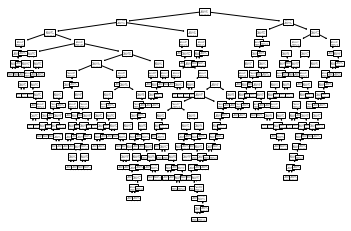

In [44]:
from sklearn import tree
tree.plot_tree(dt)

In [45]:
#test model
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score, roc_auc_score
print(f"training accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"testing accuracy: {accuracy_score(y_test, y_test_pred)}")

training accuracy: 0.9859353023909986
testing accuracy: 0.7528089887640449


In [47]:
# Lets tweak the model's parameters
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=10)
dt.fit(X_train, y_train)

#test model
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

print(f"training accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"testing accuracy: {accuracy_score(y_test, y_test_pred)}")

training accuracy: 0.8481012658227848
testing accuracy: 0.8146067415730337


In [64]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [49]:
# run using default rfc
# run using same config for decision tree above
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

#test model
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

print(f"training accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"testing accuracy: {accuracy_score(y_test, y_test_pred)}")

training accuracy: 0.9859353023909986
testing accuracy: 0.7584269662921348


In [62]:
# run using default rfc
# run using same config for decision tree above
rfc = RandomForestClassifier(n_estimators=10, max_depth=1, min_samples_leaf=6, min_samples_split=6)
rfc.fit(X_train, y_train)

#test model
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

print(f"training accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"testing accuracy: {accuracy_score(y_test, y_test_pred)}")

training accuracy: 0.7834036568213784
testing accuracy: 0.8089887640449438


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import time
from sklearn.metrics import classification_report

In [78]:
#create base classifiers for training
clf_lg = LogisticRegression()
clf_rf = RandomForestClassifier()
clf_etc = ExtraTreesClassifier()

clf_lg.fit(X_train,y_train)
clf_rf.fit(X_train,y_train)
clf_etc.fit(X_train,y_train)

for clf in [clf_lg,clf_rf,clf_etc]:
    start = time.time()
    clf_name = clf.__class__.__name__
    print(f"Classifier: {clf_name}")
    # get the average score of the k fold
    cv_score = np.mean(cross_val_score(clf,X_train, y_train, cv = 3, scoring = 'roc_auc'))
    print(f'ROC_AUC score is {cv_score}')
    print(f'Total time to train: {time.time()-start}s')


/Users/premchandran/opt/anaconda3/envs/python38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier: LogisticRegression
ROC_AUC score is 0.8520675381732133
Total time to train: 0.07486391067504883s
Classifier: RandomForestClassifier


/Users/premchandran/opt/anaconda3/envs/python38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/premchandran/opt/anaconda3/envs/python38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

ROC_AUC score is 0.8565558924658729
Total time to train: 0.4047088623046875s
Classifier: ExtraTreesClassifier
ROC_AUC score is 0.8455237389027342
Total time to train: 0.3244810104370117s


In [77]:
for clf in [clf_lg,clf_rf,clf_etc]:
    start = time.time()
    clf_name = clf.__class__.__name__
    print(f"Classifier: {clf_name}")
    prediction = clf.predict(X_test)
    # get the average score of the k fold
    cv_score = roc_auc_score(y_test, prediction)
    print(f'ROC_AUC score is {cv_score}')
    print(f'Total time to train: {time.time()-start}s')
    print(f'Classification Report: {classification_report(y_test,prediction)}')

Classifier: LogisticRegression
ROC_AUC score is 0.7812126047068209
Total time to train: 0.004851818084716797s
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.78      0.81       109
           1       0.69      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.79      0.78      0.78       178

Classifier: RandomForestClassifier
ROC_AUC score is 0.7621326951203298
Total time to train: 0.01752781867980957s
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.77      0.80       109
           1       0.68      0.75      0.71        69

    accuracy                           0.76       178
   macro avg       0.75      0.76      0.76       178
weighted avg       0.77      0.76      0.77       178

Classifier: ExtraTreesClassifier
ROC_AUC score is 0.7812126047068209
Total ti

## Optimizing using GridSearchCV and getting the best model

In [79]:
from sklearn.model_selection import GridSearchCV

In [84]:
#Lets optimize extra trees classifier
param_grid = {'n_estimators': [10,20, 100, 300],
              'max_depth': [5,10, None],
              'min_samples_split': [2,3,5,6],
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [2,5,6]
}

gs_etc = GridSearchCV(clf_etc, param_grid, scoring = 'roc_auc', cv = 3, verbose = 1, n_jobs= -1)

start = time.time()
print ("Performing Grid Search...")

gs_etc.fit(X_train, y_train)
score = gs_etc.best_score_

print(f'Grid Search best ROC AUC score for Extra Trees Classifier is {score}')

#get best parameters for the most optimized model
best_params = gs_etc.best_estimator_.get_params()

print('Best Parameters:')
for param_name in sorted(param_grid.keys()):
    print('\t{}: {}'.format(param_name, best_params[param_name]))
print("")

# Get best estimator and store it in a variable so that can be used as pickle file later
clf_etc_best = gs_etc.best_estimator_
print(f'Total time to train: {time.time()-start}s \n')

#Make predictions using the optimized model
best_prediction = clf_etc_best.predict(X_test)
# get the average score of the k fold
cv_score = roc_auc_score(y_test, best_prediction)
print(f'ROC_AUC score after grid search is {cv_score}')
print(" ")
print(f'Classification Report: {classification_report(y_test,best_prediction)}')


Performing Grid Search...
Fitting 3 folds for each of 288 candidates, totalling 864 fits
Grid Search best ROC AUC score for Extra Trees Classifier is 0.869619782503018
Best Parameters:
	criterion: entropy
	max_depth: 10
	min_samples_leaf: 2
	min_samples_split: 6
	n_estimators: 20

Total time to train: 10.696261167526245s 

ROC_AUC score after grid search is 0.7671852147320835
 
Classification Report:               precision    recall  f1-score   support

           0       0.81      0.85      0.83       109
           1       0.75      0.68      0.71        69

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.78      0.79      0.78       178



In [88]:
df[df.columns[df.dtypes != object]]

,Age,Fare,Embarked
0,22.000000,7.2500,2.0
1,38.000000,71.2833,0.0
2,26.000000,7.9250,2.0
3,35.000000,53.1000,2.0
4,35.000000,8.0500,2.0
...,...,...,...
886,27.000000,13.0000,2.0
887,19.000000,30.0000,2.0
888,29.699118,23.4500,2.0
889,26.000000,30.0000,0.0


In [ ]:
df.dtypes == object